In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
data = pd.read_csv('Baltimore911.csv', low_memory=False)

In [13]:
import pandas as pd
import numpy as np

# Load your dataset (replace 'dataset.csv' with your data source)
data = pd.read_csv('Baltimore911.csv', low_memory=False)

# Total number of call instances/rows
total_rows = len(data)

# Total number of call features/columns
total_columns = len(data.columns)

# Create a DataFrame to store the profile information
profile_df = pd.DataFrame(columns=['Column Name', 'Data Type', 'Attribute Type', 'Min', 'Max', 'Mean', 'Median', 'Std Dev',
                                   'Unique Values', 'Top 1', 'Top 2', 'Top 3', 'Missing (%)'])

# Iterate through each column in the dataset
for column_name in data.columns:
    column_data = data[column_name]
    data_type = str(column_data.dtype)
    
    # Determine attribute type (numeric or discrete)
    if np.issubdtype(column_data.dtype, np.number):
        attribute_type = 'Numeric'
        min_value = column_data.min()
        max_value = column_data.max()
        mean_value = column_data.mean()
        median_value = column_data.median()
        std_dev = column_data.std()
        
        unique_values = np.nan  # Not applicable for numeric attributes
        top1, top2, top3 = np.nan, np.nan, np.nan  # Not applicable for numeric attributes
    else:
        attribute_type = 'Discrete'
        min_value, max_value, mean_value, median_value, std_dev = np.nan, np.nan, np.nan, np.nan, np.nan
        unique_values = column_data.nunique()
        top_values = column_data.value_counts().head(3)
        top1, top2, top3 = top_values.index[0], top_values.index[1], top_values.index[2]
    
    # Calculate missingness (% of rows with missing values)
    missing_percentage = (column_data.isnull().mean()) * 100
    
    # Append information to the profile DataFrame
    profile_df = profile_df.append({'Column Name': column_name,
                                    'Data Type': data_type,
                                    'Attribute Type': attribute_type,
                                    'Min': min_value,
                                    'Max': max_value,
                                    'Mean': mean_value,
                                    'Median': median_value,
                                    'Std Dev': std_dev,
                                    'Unique Values': unique_values,
                                    'Top 1': top1,
                                    'Top 2': top2,
                                    'Top 3': top3,
                                    'Missing (%)': missing_percentage},
                                   ignore_index=True)

# Print the dataset profile table
print(profile_df)


C:\Users\sathw\AppData\Local\Temp\ipykernel_10236\1586364194.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sathw\AppData\Local\Temp\ipykernel_10236\1586364194.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sathw\AppData\Local\Temp\ipykernel_10236\1586364194.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sathw\AppData\Local\Temp\ipykernel_10236\1586364194.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sathw\AppData\Local\Temp\ipykernel_10236\1586364194.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

        Column Name Data Type Attribute Type        Min        Max       Mean  \
0         CrimeDate    object       Discrete        NaN        NaN        NaN   
1         CrimeTime    object       Discrete        NaN        NaN        NaN   
2         CrimeCode    object       Discrete        NaN        NaN        NaN   
3          Location    object       Discrete        NaN        NaN        NaN   
4       Description    object       Discrete        NaN        NaN        NaN   
5    Inside/Outside    object       Discrete        NaN        NaN        NaN   
6            Weapon    object       Discrete        NaN        NaN        NaN   
7              Post    object       Discrete        NaN        NaN        NaN   
8          District    object       Discrete        NaN        NaN        NaN   
9      Neighborhood    object       Discrete        NaN        NaN        NaN   
10        Longitude   float64        Numeric -81.529189 -76.383228 -76.617452   
11         Latitude   float6

C:\Users\sathw\AppData\Local\Temp\ipykernel_10236\1586364194.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sathw\AppData\Local\Temp\ipykernel_10236\1586364194.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sathw\AppData\Local\Temp\ipykernel_10236\1586364194.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



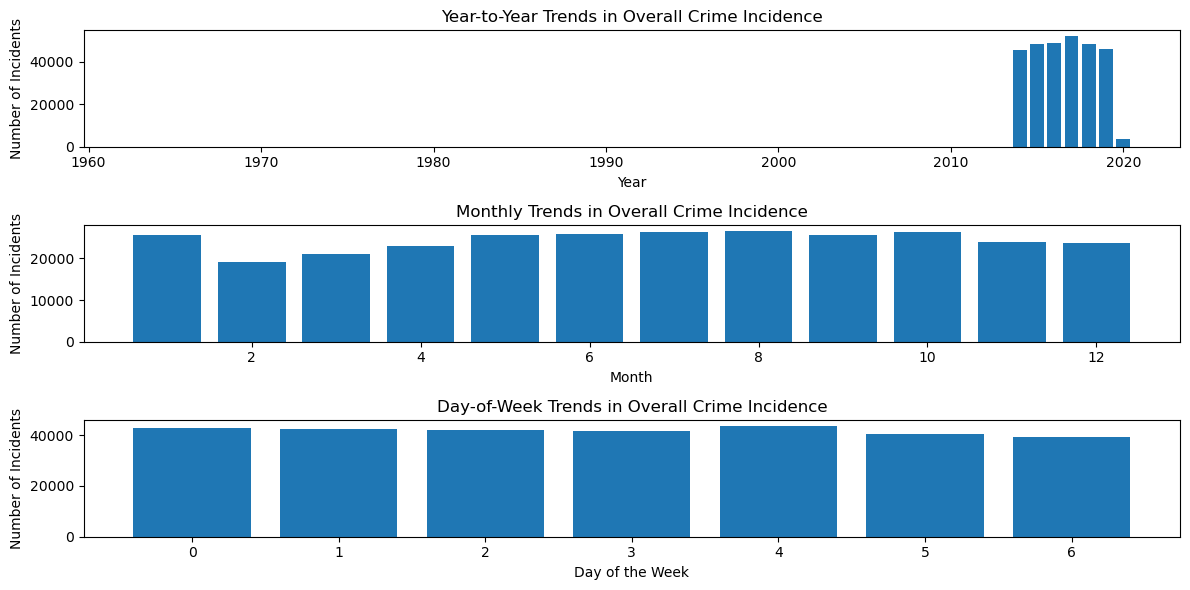

In [4]:
import matplotlib.pyplot as plt

# Assuming you have a datetime column named 'timestamp' in your DataFrame
data['CrimeDate'] = pd.to_datetime(data['CrimeDate'])

# Extract year, month, and day of the week from the timestamp
data['year'] = data['CrimeDate'].dt.year
data['month'] = data['CrimeDate'].dt.month
data['day_of_week'] = data['CrimeDate'].dt.dayofweek  # 0=Monday, 6=Sunday

# Group data by year, month, and day of the week and count incidents
yearly_incidents = data['year'].value_counts().sort_index()
monthly_incidents = data['month'].value_counts().sort_index()
day_of_week_incidents = data['day_of_week'].value_counts().sort_index()

# Create plots for year-to-year, monthly, and day-of-week trends
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.bar(yearly_incidents.index, yearly_incidents.values)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Year-to-Year Trends in Overall Crime Incidence')

plt.subplot(3, 1, 2)
plt.bar(monthly_incidents.index, monthly_incidents.values)
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Monthly Trends in Overall Crime Incidence')

plt.subplot(3, 1, 3)
plt.bar(day_of_week_incidents.index, day_of_week_incidents.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.title('Day-of-Week Trends in Overall Crime Incidence')

plt.tight_layout()
plt.show()


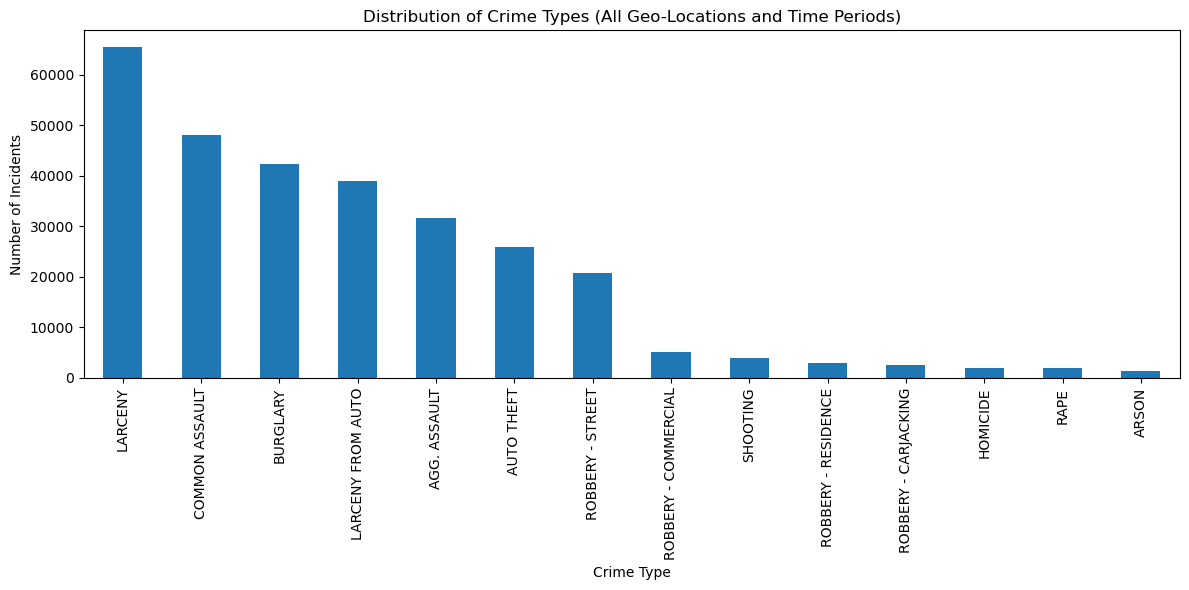

In [5]:
import matplotlib.pyplot as plt

# Assuming you have a column named 'crime_type' that represents the type of crime
# You may need to replace 'crime_type' with the actual column name in your dataset
crime_type_counts = data['Description'].value_counts()

# Create a bar plot for the distribution of crime types
plt.figure(figsize=(12, 6))
crime_type_counts.plot(kind='bar')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Crime Types (All Geo-Locations and Time Periods)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

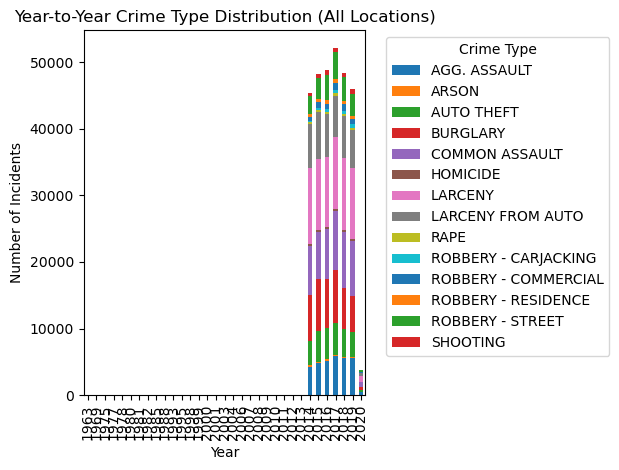

In [6]:
import matplotlib.pyplot as plt

# Assuming you have columns 'year' and 'crime_type' in your DataFrame
data['CrimeDate'] = pd.to_datetime(data['CrimeDate'])

# Extract year, month, and day of the week from the timestamp
data['year'] = data['CrimeDate'].dt.year

yearly_crime_type_counts = data.groupby(['year', 'Description']).size().unstack(fill_value=0)

# Create a stacked bar plot for year-to-year crime type distribution
plt.figure(figsize=(12, 6))
yearly_crime_type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Year-to-Year Crime Type Distribution (All Locations)')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

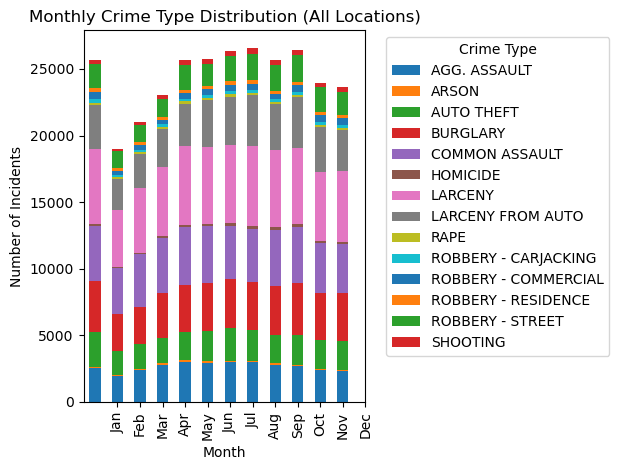

In [7]:
# Assuming you have columns 'month' and 'crime_type' in your DataFrame
data['CrimeDate'] = pd.to_datetime(data['CrimeDate'])

# Extract year, month, and day of the week from the timestamp
data['month'] = data['CrimeDate'].dt.month

monthly_crime_type_counts = data.groupby(['month', 'Description']).size().unstack(fill_value=0)

# Create a stacked bar plot for month-to-month crime type distribution
plt.figure(figsize=(12, 6))
monthly_crime_type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Monthly Crime Type Distribution (All Locations)')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

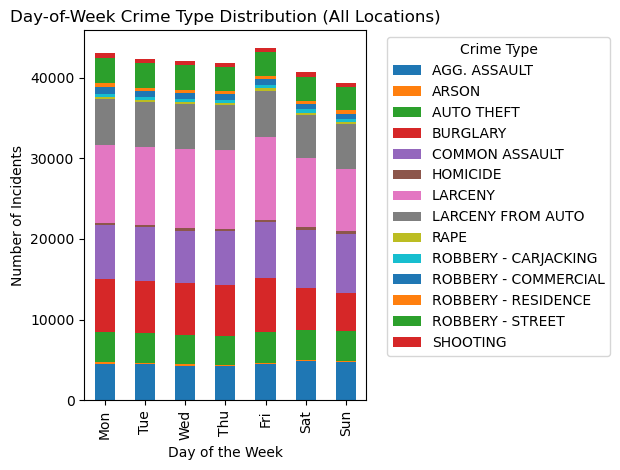

In [8]:
# Assuming you have columns 'day_of_week' and 'crime_type' in your DataFrame
data['CrimeDate'] = pd.to_datetime(data['CrimeDate'])

# Extract year, month, and day of the week from the timestamp
data['day_of_week'] = data['CrimeDate'].dt.dayofweek

day_of_week_crime_type_counts = data.groupby(['day_of_week', 'Description']).size().unstack(fill_value=0)

# Create a stacked bar plot for day-of-week crime type distribution
plt.figure(figsize=(12, 6))
day_of_week_crime_type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.title('Day-of-Week Crime Type Distribution (All Locations)')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()


In [9]:
!pip install dash dash-core-components dash-html-components pandas


In [11]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load your crime dataset (replace with your data source)
df2 = pd.read_csv('Baltimore911.csv')

# Replace missing locations with 'Unknown'
df2['Location'].fillna('Unknown', inplace=True)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Crime Exploration Dashboard"),

    # Dropdown for location
    dcc.Dropdown(
        id='location-dropdown',
        options=[{'label': location, 'value': location} for location in df2['Location'].unique()] + [{'label': 'All', 'value': 'All'}],
        multi=True,
        value=[],  # Default: no location selected
        placeholder="Select Location(s)"
    ),

    # Date Range Picker
    dcc.DatePickerRange(
        id='date-picker',
        start_date=min(df2['CrimeDate']),  # Default: minimum date
        end_date=max(df2['CrimeDate']),  # Default: maximum date
        display_format='YYYY-MM-DD',  # Display year, month, and day
    ),

    # Graph to display crime incidents on a map
    dcc.Graph(id='crime-map'),

    # Additional plots or insights can be added here
])

# Define callback to update the crime map based on user inputs
@app.callback(
    Output('crime-map', 'figure'),
    Input('location-dropdown', 'value'),
    Input('date-picker', 'start_date'),
    Input('date-picker', 'end_date')
)
def update_crime_map(selected_locations, start_date, end_date):
    filtered_df = df2.copy()

    # Apply filters based on user selections
    if selected_locations and 'All' not in selected_locations:
        filtered_df = filtered_df[filtered_df['Location'].isin(selected_locations)]

    filtered_df = filtered_df[
        (filtered_df['CrimeDate'] >= start_date) &
        (filtered_df['CrimeDate'] <= end_date)
    ]

    # Calculate description counts dynamically
    description_counts = filtered_df['Description'].value_counts().reset_index()
    description_counts.columns = ['Description', 'DescriptionCount']

    # Merge the description counts back into the filtered DataFrame
    filtered_df = pd.merge(filtered_df, description_counts, on='Description')

    # Create a new column combining Description and DescriptionCount
    filtered_df['DescriptionWithCount'] = filtered_df['Description'] + ' (' + filtered_df['DescriptionCount'].astype(str) + ')'

    # Create a scatter map using Plotly Express with DescriptionWithCount as color
    fig = px.scatter_mapbox(
        filtered_df,
        lat='Latitude',
        lon='Longitude',
        color='DescriptionWithCount',  # Color by description with count
        hover_name='DescriptionWithCount',  # Hover text includes description with count
        zoom=10,
    )

    fig.update_layout(
        mapbox_style="carto-positron",
        margin={"r": 0, "t": 0, "l": 0, "b": 0},
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True,port=8051)


C:\Users\sathw\AppData\Local\Temp\ipykernel_10236\1247419148.py:9: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.

